In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 

In [16]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
testId = test.Property_Id
train.Price_Category = train.Price_Category.replace("Cheap",0).replace("Affordable",1).replace("Semi-Premium",2).replace("Premium",3)
y = train.Price_Category
train = train.drop(["Property_Id", "Price_Category"],axis=1)
train.head(1)

,Title,Label,Type,Location,Baths,Area,Purpose,Bedroom(s),Description,Main Features,Rooms,Business and Communication,Healthcare Recreational,Nearby Locations and Other Facilities,Other Facilities,Popular,Source,Time Stamp
0,Brand New 1 Kanal House For Sale In Bahria Tow...,"Bahria Town - Gulbahar Block, Bahria Town - Se...",House,"Bahria Town, Lahore, Punjab",6,1 Kanal,For Sale,5,Brand New 1 Kanal House For Sale In Bahria Tow...,"Built in year: 2018 , Parking Spaces: 4 , Dou...","Bedrooms: 5 , Bathrooms: 7 , Servant Quarters...","Broadband Internet Access , Satellite or Cabl...","Lawn or Garden , Swimming Pool","Nearby Schools , Nearby Hospitals , Nearby Sh...","Maintenance Staff , Security Staff , Faciliti...",super hot,Lahore-1-10,3/31/2019 11:01


In [17]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 1000
train["encoded"] = [one_hot(sentence, vocab_size) for sentence in train["Description"]]



(array([1.891e+03, 7.430e+02, 2.860e+02, 8.200e+01, 4.900e+01, 1.500e+01,
        1.000e+00, 1.100e+01, 2.000e+00, 2.000e+00]),
 array([1.000e+00, 1.067e+02, 2.124e+02, 3.181e+02, 4.238e+02, 5.295e+02,
        6.352e+02, 7.409e+02, 8.466e+02, 9.523e+02, 1.058e+03]),
 <a list of 10 Patch objects>)

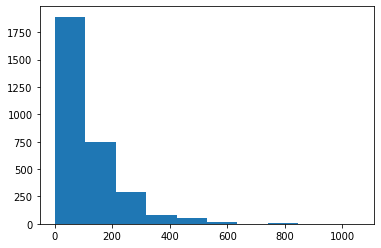

In [18]:
#How long are each of the titles
highest = []
for x in train["encoded"]: highest.append(len(x))
max(highest)
import matplotlib.pyplot as plt 
counts, bins = np.histogram(highest)
plt.hist(bins[:-1], bins, weights=counts)

In [19]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = int(np.median(highest))
X = pad_sequences(list(train.encoded), maxlen=max_length, padding='pre')


In [20]:
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout,Flatten
from tensorflow.keras.models import Sequential
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.948):
      print("\nReached 94% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

model = Sequential()
model.add(Embedding(1000, 45, input_length=max_length)) 
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# embedding_vector_features=40
# model=Sequential()
# model.add(Embedding(218605,embedding_vector_features,input_length=max_length)) ## embedding layer used 40 features to make feature representation of the sentences
# model.add(Dropout(0.3))
# model.add(LSTM(100))
# model.add(Dropout(0.3)) ## drop out layer to make the model more regularized
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


print(model.summary()) ## model architechture done






Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 82, 45)            45000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 82, 45)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3690)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3690)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3691      
Total params: 48,691
Trainable params: 48,691
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #default shuffle = True but random state = 42 means always same random shuffle


history = model.fit(x_train, y_train, validation_split=.2, epochs=1, batch_size=5, verbose=1, callbacks=[callbacks])



395/395 [==============================] - 2s 3ms/step - loss: -50.6893 - accuracy: 0.0590 - val_loss: -691.7482 - val_accuracy: 0.0527


In [22]:
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 5.996758
